# Random Forest Model interpretation

In [1]:
%load_ext autoreload
%autoreload 2
# reloads modules automatically before entering 
# the execution of code typed at the IPython prompt.


# draw plots in the notebook
%matplotlib inline

In [2]:
# import libraries 
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [3]:
set_plot_sizes(12,14,16)

We can create a variable PATH for where our project files such as csv file will be stored to make our work easier. The PATH will be different based on where your files are.

In [4]:
PATH = "/media/muoki/data/documents/code_training/portfolio/DataScienceProjects/fastai_Intro_ml/"

<h4>Loading the data.</h4>
<p>We will use a feather formart that we had earlier saved. Otherwise we can use pandas to read the csv file.</p>

In [5]:
import feather
df_raw = feather.read_dataframe(f'{PATH}tmp/bulldozers-raw')

In [6]:
# incase you don't have the feather formart
# df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, 
  #                   parse_dates=["saledate"])

In [7]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')

In [8]:
def split_vals(a,n): 
    return a[:n], a[n:]


n_valid = 12000
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

In [9]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [10]:
df_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,0,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,0,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,1,S175,...,23,3,204,False,False,False,False,False,False,1248307200
5,1139255,10.184900,1001274,4605,121,3.0,2004,508.0,2,310G,...,18,3,353,False,False,False,False,False,False,1229558400
6,1139256,9.952278,772701,1937,121,3.0,1993,11540.0,0,790ELC,...,26,3,239,False,False,False,False,False,False,1093478400
7,1139261,10.203592,902002,3539,121,3.0,2001,4883.0,0,416D,...,17,3,321,False,False,False,False,False,False,1132185600
8,1139272,9.975808,1036251,36003,121,3.0,2008,302.0,2,430HAG,...,27,3,239,False,False,False,False,False,False,1251331200
9,1139275,11.082143,1016474,3883,121,3.0,1000,20700.0,1,988B,...,9,3,221,False,False,False,False,False,False,1186617600


# Confidence based on tree variance

In [11]:
set_rf_samples(50000)

a subset will be both faster, and also provide better interpretability (since an overfit model will not provide much variance across trees).

In [12]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 52.7 s, sys: 1.56 s, total: 54.3 s
Wall time: 22.2 s
[0.2060549066081592, 0.247621822527557, 0.9112638162898865, 0.8904970534626888, 0.894267852617157]


In [13]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 1.67 s, sys: 36.5 ms, total: 1.71 s
Wall time: 1.72 s


(9.241757465306748, 0.3110885030317734)

In [14]:
def get_preds(t): 
    return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 165 ms, sys: 109 ms, total: 274 ms
Wall time: 1.2 s


(9.241757465306748, 0.3110885030317734)

In [15]:
?parallel_trees


different trees are giving different estimates this this auction. In order to see how prediction confidence varies, we can add this into our dataset.

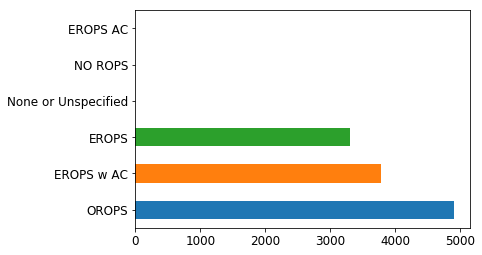

In [16]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0) #create a column for std of prediction
x['pred'] = np.mean(preds, axis=0) # create a column for mean of preds
x.Enclosure.value_counts().plot.barh();

In [17]:
flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std']
enc_summ = x[flds].groupby('Enclosure', as_index=False).mean()
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.849178,9.838286,0.27383
1,EROPS AC,NaN,NaN,NaN
2,EROPS w AC,10.623971,10.574407,0.26727
3,NO ROPS,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN
5,OROPS,9.682064,9.680926,0.22159


sales and pred mean are close

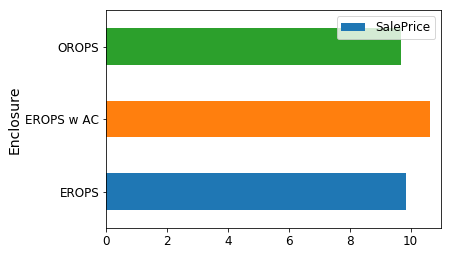

In [18]:
enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('Enclosure', 'SalePrice', 'barh', xlim=(0,11));

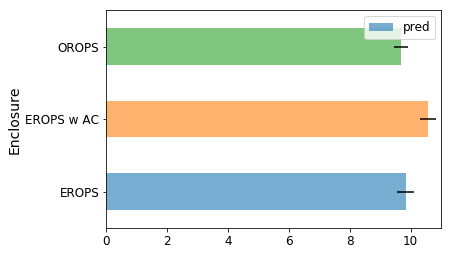

In [19]:
enc_summ.plot('Enclosure', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,11));

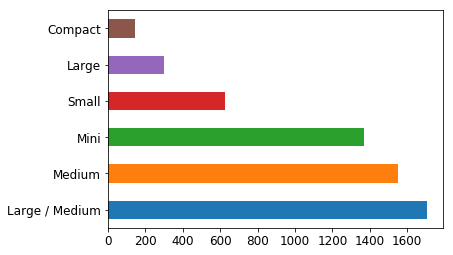

In [20]:
raw_valid.ProductSize.value_counts().plot.barh();

In [21]:
flds = ['ProductSize', 'SalePrice', 'pred', 'pred_std']
summ = x[flds].groupby(flds[0]).mean()
summ

,SalePrice,pred,pred_std
ProductSize,,,
Compact,9.735093,9.841046,0.343705
Large,10.470589,10.379311,0.365291
Large / Medium,10.691871,10.649963,0.299427
Medium,10.681511,10.624300,0.290660
Mini,9.535147,9.557316,0.244815
Small,10.324448,10.321057,0.307708


In [22]:
(summ.pred_std/summ.pred).sort_values(ascending=False)

ProductSize
Large             0.035194
Compact           0.034926
Small             0.029814
Large / Medium    0.028115
Medium            0.027358
Mini              0.025615
dtype: float64

# Feature importance
this tells us which columns matter

In [23]:
fi = rf_feat_importance(m, df_trn); fi[:10]

,cols,imp
5,YearMade,0.171053
37,Coupler_System,0.154566
13,ProductSize,0.093850
14,fiProductClassDesc,0.089835
2,ModelID,0.055724
63,saleElapsed,0.050073
10,fiSecondaryDesc,0.043777
19,Enclosure,0.033205
8,fiModelDesc,0.030722
12,fiModelDescriptor,0.029725


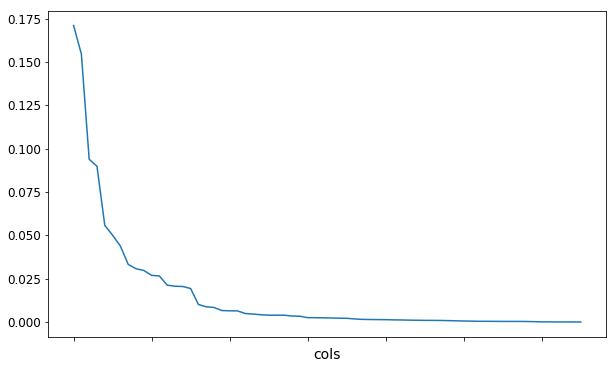

In [24]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

we can plot columns in the orderof importance

In [25]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

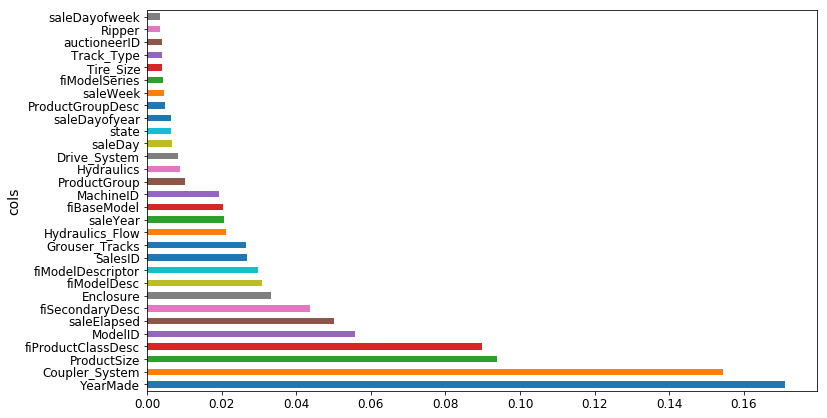

In [26]:
plot_fi(fi[:30])

In [27]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

22

We removed columns with an importance of less than 0.005 

In [28]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [29]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.2073171063383805, 0.24681010618428148, 0.9101733707542587, 0.8912137887263416, 0.8937319069451886]


The R^2 didn't change as the less important columns didn't have alot of impact. It also addresses colinearity

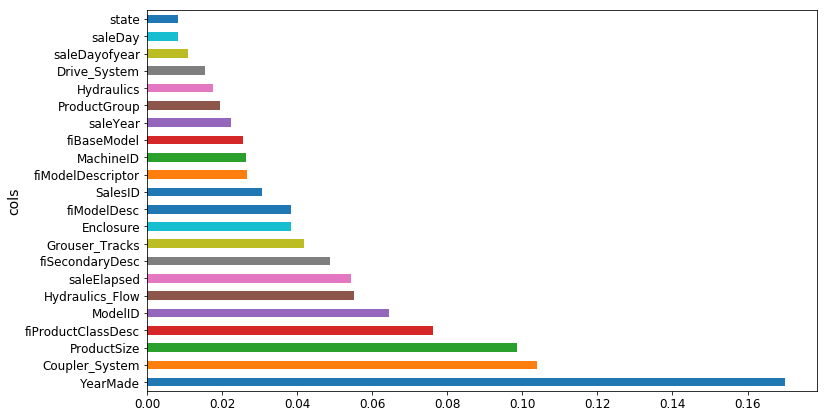

In [30]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi)

a hyperparameter is a parameter whose value is set before the learning process begins. By contrast, the values of other parameters are derived via training. 

min_samples_leaf removes a layer from the tree. if we are using 20000 samples we will end up with 20000 leaf nodes. if we set the min_sample_leaf to 1 we will get 10000 leaf nodes.

max_features at each split in a tree we pick a different half of the features. Trees are going to be more varied less accurate creating more trees with less correlation.

## One-hot encoding

proc_df's optional *max_n_cat* argument will turn some categorical variables into new columns.

For example, the column **ProductSize** which has 6 categories:

* Large
* Large / Medium
* Medium
* Compact
* Small
* Mini

gets turned into 6 new columns:

* ProductSize_Large
* ProductSize_Large / Medium
* ProductSize_Medium
* ProductSize_Compact
* ProductSize_Small
* ProductSize_Mini

and the column **ProductSize** gets removed.

It will only happen to columns whose number of categories is no bigger than the value of the *max_n_cat* argument.

Now some of these new columns may prove to have more important features than in the earlier situation, where all categories were in one column.

In [31]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20704834030984787, 0.2529129803258163, 0.910406122385307, 0.8857673602925455, 0.8927838393274624]


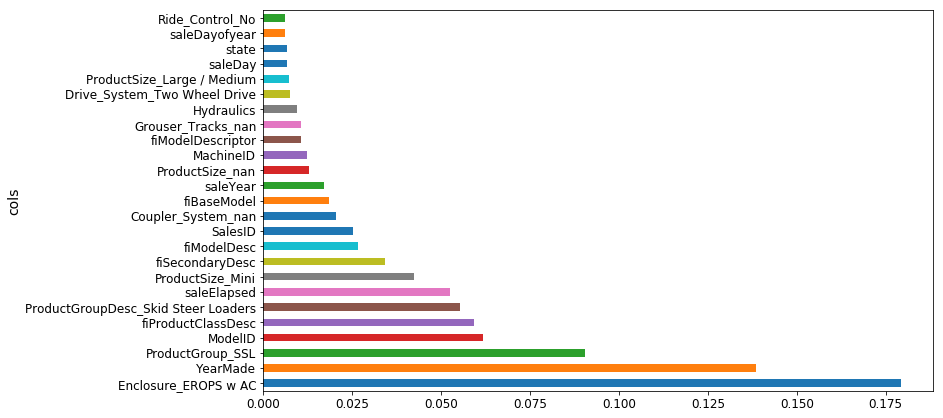

In [33]:
fi = rf_feat_importance(m, df_trn2)
plot_fi(fi[:25])

# Removing redundant features

Correlation is a statistical technique that can show whether and how strongly pairs of variables are related. For example, height and weight are related; taller people tend to be heavier than shorter people
it is harder to interpret is that there seem to be some variables with very similar meanings.

In [34]:
from scipy.cluster import hierarchy as hc

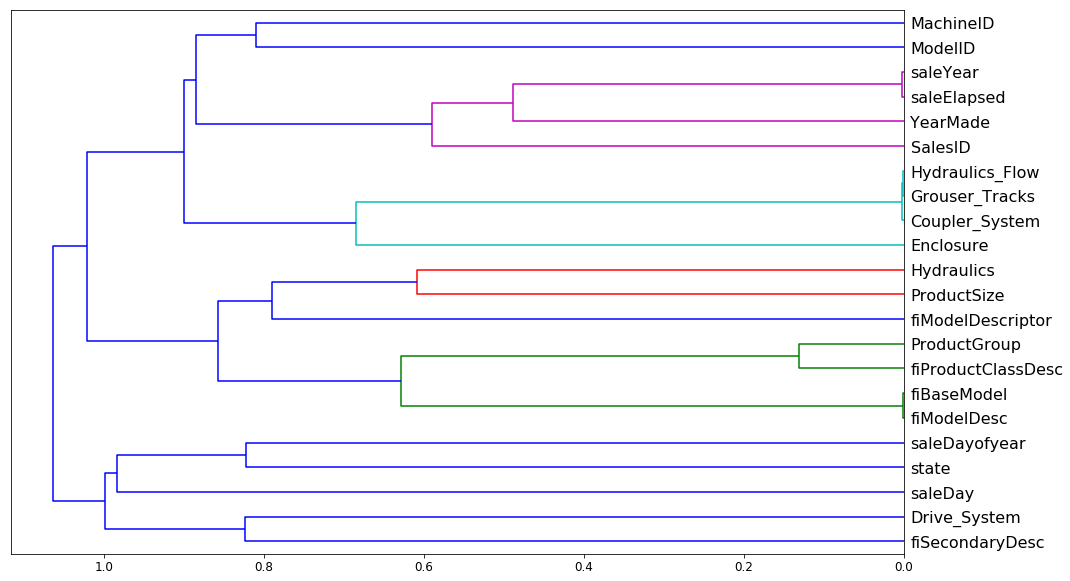

In [35]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

Let's try removing some of these related features to see if the model can be simplified without impacting the accuracy.

In [36]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

our baseline.

In [37]:
get_oob(df_keep)

0.8897627497251092

In [40]:
df_keep.head()

,YearMade,Coupler_System,ProductSize,fiProductClassDesc,ModelID,saleElapsed,fiSecondaryDesc,Enclosure,fiModelDesc,fiModelDescriptor,...,Hydraulics_Flow,saleYear,fiBaseModel,MachineID,ProductGroup,Hydraulics,Drive_System,saleDay,state,saleDayofyear
0,2004,0,0,59,3157,1163635200,41,3,950,0,...,0,2006,296,999089,6,1,0,16,1,320
1,1996,0,4,62,77,1080259200,55,3,1725,0,...,0,2004,527,117657,6,1,0,26,33,86
2,2001,1,0,39,7009,1077753600,0,6,331,0,...,3,2004,110,434808,3,4,0,26,32,57
3,2001,0,6,8,332,1305763200,0,3,3674,0,...,0,2011,1375,1026470,4,1,0,19,44,139
4,2007,1,0,40,17311,1248307200,0,1,4208,0,...,3,2009,1529,1057373,3,4,0,23,32,204


df_keep is the dataframe with columns that have more than 0.05 importance

In [39]:
for c in ('saleYear', 'saleElapsed', 'fiModelDesc', 'fiBaseModel', 'Grouser_Tracks', 'Coupler_System'):
    print(c, get_oob(df_keep.drop(c, axis=1)))

saleYear 0.8889515492888702
saleElapsed 0.8875992629827024
fiModelDesc 0.8889190998810707
fiBaseModel 0.8889562205089747
Grouser_Tracks 0.8898149350483625
Coupler_System 0.8896524535481032
